## Исследование данных о российском кинопрокате



Заказчик этого исследования — Министерство культуры Российской Федерации.
В этой работе мы изучим рынок российского кинопроката и выявим текущие тренды. Уделим внимание фильмам, которые получили государственную поддержку. 

### Откроем файлы с данными и объедините их в один датафрейм. 

Объединим данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb
pd.options.display.float_format = '{:.2f}'.format
import warnings
import numpy as np
warnings.filterwarnings(action='ignore', category=FutureWarning)
movies = pd.read_csv('/datasets/mkrf_movies.csv')
shows = pd.read_csv('/datasets/mkrf_shows.csv')

In [2]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [3]:
shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Нужно объединить данные по столбцу puNumber, но в столбцах указаны разные типы данных.

In [4]:
movies.loc[movies['puNumber'].str.isalpha()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
movies['puNumber'] = pd.to_numeric(movies['puNumber'], errors='coerce') 

In [6]:
movies['puNumber'] = movies['puNumber'].fillna(0)
movies['puNumber'] = movies['puNumber'].astype('int')

Перевели значение столбца puNumber датасета movies в тип int. Теперь можно объединить датасеты.

In [7]:
movies = movies.merge(shows,on='puNumber', how='left')
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [8]:
movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


Объединили датафремы с информацией о прокатных удостоверениях и о прокате в российских кинотеатрах по номерам прокатных удостоверений. Информация из датафрема о прокатных удостоверениях полностью вошла в новый датафрейм.

###  Предобработка данных

#### Проверим типы данных

- Проверим типы данных в датафрейме и преобразуем их там, где это необходимо.

In [9]:
movies['show_start_date'] = pd.to_datetime(movies['show_start_date'], format = '%Y-%m-%d')
movies['ratings'] = pd.to_numeric(movies['ratings'],errors='coerce')

Преобразовали тип данных во временной у столбца show_start_date. Изменили тип в столбце ratings на числовой.

#### Изучим пропуски в датафрейме


In [10]:
movies.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   996
genres                    976
box_office               4328
dtype: int64

Проверим количество пропусков в каждом столбце.
Пропуски в столбцах film_studio, production_country, director, producer, ratings и genres заполнять не будем, т.к. выявить в них зависимоть не получится. Можно предположить, что определенная студия снимает только некоторые жанры фильмов или в каких странах эта студия работает. Но зависимость выясвить сложно.
В столбцах refundable_support, nonrefundable_support, budget и financing_source одинаковое количество пропусков. Можно предположить, что эти фильмы не финансировались государством, поэтому по ним нет данных. Заполнение пропусков нулями невозможно, т.к. возможно были фильмы которые не принесли возвратных средств или в них не было невозвратных средств. Заполнять пропуски не будем.
Пропуски в столбце box_office вызваны тем, что в первом исходном датафрейме вообще не было этого столбца. В нем сожержится информация только о сборах в российских кинотеатрах. Заполнить пропуски мы не сможем.

#### Изучим дубликаты в датафрейме


In [11]:
movies.duplicated().sum()

0

Явных дубликатов во всем датафрейме нет.

In [12]:
movies['puNumber'].duplicated().sum()
movies['puNumber'] = movies['puNumber'].drop_duplicates()

In [13]:
movies['title'] = movies['title'].str.lower()
movies['title'] = movies['title'].str.lstrip()
movies['title'] = movies['title'].str.rstrip()
movies['title'] = movies['title'].str.rstrip('.')
movies['title'] = movies['title'].str.replace('"', '')
movies['title'] = movies['title'].str.replace('#', '')
movies['title'].unique()

array(['открытый простор', 'особо важное задание', 'особо опасен', ...,
       'щенячий патруль: скорей спешим на помощь!',
       'машины песенки. серия испанские мотивы',
       'машины песенки. серия когда цветут кактусы'], dtype=object)

Привели названия фильмов к единому формату. Разные фильмы могут иметь одинкаовые названия, поэтому оставим все как есть. Если номера прокатных удостоверений разные, то будем считать эти фильмы разными.

In [14]:
movies['type'].sort_values().unique()

array([' Анимационный', ' Художественный', 'Анимационный',
       'Документальный', 'Музыкально-развлекательный',
       'Научно-популярный', 'Прочие', 'Художественный'], dtype=object)

In [15]:
movies['type'] = movies['type'].str.lower()
movies['type'] = movies['type'].str.lstrip()
movies['type'].sort_values().unique()

array(['анимационный', 'документальный', 'музыкально-развлекательный',
       'научно-популярный', 'прочие', 'художественный'], dtype=object)

Избавляемся от дубликатов в типах фильмов приведя к единому формату написания.

In [16]:
movies['film_studio'] = movies['film_studio'].str.lower()
movies['film_studio'] = movies['film_studio'].str.lstrip()
movies['film_studio'] = movies['film_studio'].str.rstrip()
movies['film_studio'] = movies['film_studio'].str.replace('"', '')

In [17]:
movies['film_studio']

0       тачстоун пикчерз, кобальт пикчерз, бикон пикче...
1                                     киностудия мосфильм
2       юниверсал пикчерз, кикстарт продакшнз, марк пл...
3       юниверсал пикчерз, кикстарт продакшнз, марк пл...
4       юниверсал пикчерз, кикстарт продакшнз, марк пл...
                              ...                        
7481                                 севен артс продакшнз
7482    дэниел гродник продакшнз, вандерфилм медиа кор...
7483             никелодеон анимейшн студиос, спин мастер
7484               анимаккорд лтд., ооо студия анимаккорд
7485               анимаккорд лтд., ооо студия анимаккорд
Name: film_studio, Length: 7486, dtype: object

In [18]:
movies['film_studio'] = movies['film_studio'].str.replace('яш радж филмз ', 'яш радж фильм') 

Названия студий очень сложно читаемы, т.к. написаны русским транслитом. Избавляемся от возможных дубликатов.

In [19]:
movies['production_country'] = movies['production_country'].str.lower()
movies['production_country'] = movies['production_country'].str.lstrip()
movies['production_country'] = movies['production_country'].str.rstrip()
movies['production_country'] = movies['production_country'].str.replace(',', '-')
movies['production_country'] = movies['production_country'].str.replace(' - ', '-')
movies['production_country'].sort_values().unique()

array(['2019', 'cша', 'австралия', 'австралия- канада', 'австралия- сша',
       'австралия-великобритания',
       'австралия-великобритания-бельгия-индия', 'австралия-германия',
       'австралия-ирландия', 'австралия-колумбия', 'австралия-сша',
       'австралия-турция-сша', 'австрия',
       'австрия- великобритания- германия', 'австрия-германия',
       'австрия-германия-франция', 'австрия-люксембург',
       'австрия-франция-германия', 'азербайджан-россия', 'аргентина',
       'аргентина- испания', 'аргентина-бразилия', 'аргентина-испания',
       'аргентина-испания-уругвай',
       'аргентина-мексика-бразилия-франция-сша',
       'аргентина-уругвай-россия-германия-франция-нидерланды',
       'аргентина-франция-испания', 'армения', 'армения-германия',
       'армения-казахстан', 'армения-россия', 'бельгия',
       'бельгия- великобритания- сша', 'бельгия- канада',
       'бельгия-германия-канада-франция-сша-великобритания',
       'бельгия-германия-люксембург',
       'бельгия-ге

Убираем дубликаты в странах производителях.

In [20]:
movies['director'] = movies['director'].str.lower()
movies['director'] = movies['director'].str.lstrip()
movies['director'] = movies['director'].str.rstrip()
movies['director'] = movies['director'].str.replace('.', ' ')
movies['director'] = movies['director'].str.replace('  ', ' ')
movies['director'].sort_values().unique()

array(['а а эшпай', 'а аббасов', 'а абидова (псевдоним аниса сабири)',
       ..., 'ёлкин туйчиев', 'ён сан-хо', nan], dtype=object)

В столбце director также возникают проблемы и дубли из-за написания имен и фамилий  в разном формате и на русском языке.

In [21]:
movies['producer'] = movies['producer'].str.lower()
movies['producer'] = movies['producer'].str.lstrip()
movies['producer'] = movies['producer'].str.rstrip()
movies['producer'] = movies['producer'].str.replace('.', ' ')
movies['producer'] = movies['producer'].str.replace('  ', ' ')
movies['producer'] = movies['producer'].str.replace('"', '')
movies['producer'].sort_values().unique()

array(['а а эшпай', 'а аболс', 'а адамская', ...,
       'яэль фогель, летиция гонзалез',
       'ёсиаки нисимура, джеффри уэкслер', nan], dtype=object)

Аналогичная ситуация со столбцом producer.

In [22]:
movies['age_restriction'] = movies['age_restriction'].str.lower()
movies['age_restriction'] = movies['age_restriction'].str.lstrip()
movies['age_restriction'] = movies['age_restriction'].str.rstrip()
movies['age_restriction'].sort_values().unique()

array(['«0+» - для любой зрительской аудитории',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет', '«18+» - запрещено для детей',
       '«6+» - для детей старше 6 лет'], dtype=object)

Тут все хорошо, нет дублей.

In [23]:
movies['genres'] = movies['genres'].str.lower()
movies['genres'] = movies['genres'].str.lstrip()
movies['genres'] = movies['genres'].str.rstrip()
movies['genres'].sort_values().unique()

array(['аниме,мультфильм', 'аниме,мультфильм,боевик',
       'аниме,мультфильм,детектив', 'аниме,мультфильм,драма',
       'аниме,мультфильм,комедия', 'аниме,мультфильм,короткометражка',
       'аниме,мультфильм,мелодрама', 'аниме,мультфильм,приключения',
       'аниме,мультфильм,ужасы', 'аниме,мультфильм,фантастика',
       'аниме,мультфильм,фэнтези', 'биография', 'биография,военный,драма',
       'биография,документальный', 'биография,драма',
       'биография,драма,военный', 'биография,драма,история',
       'биография,драма,криминал', 'биография,история',
       'биография,история,драма', 'биография,криминал,драма',
       'биография,криминал,триллер', 'биография,мелодрама,драма',
       'биография,музыка,драма', 'биография,музыка,мюзикл',
       'биография,спорт,драма', 'биография,спорт,история',
       'биография,спорт,комедия', 'боевик', 'боевик,вестерн,приключения',
       'боевик,военный', 'боевик,военный,драма', 'боевик,военный,история',
       'боевик,детектив', 'боевик,драм

In [24]:
movies['financing_source'] = movies['financing_source'].str.lower()
movies['financing_source'] = movies['financing_source'].str.lstrip()
movies['financing_source'] = movies['financing_source'].str.rstrip()
movies['financing_source'].unique()

array([nan, 'министерство культуры', 'фонд кино',
       'министерство культуры, фонд кино'], dtype=object)

Тут тоже все ок. Дублей нет.

При изучении дубликатов мы убрали пробелы в категориальных столбцах. 
В каждом столбце встречались лишние проблелы, наличие или отсутствие точки в именах при сокращении, запятые чередовались с тире. Единого формата записи не было, это является проблемой, с этим можно обратиться к источнику данных.

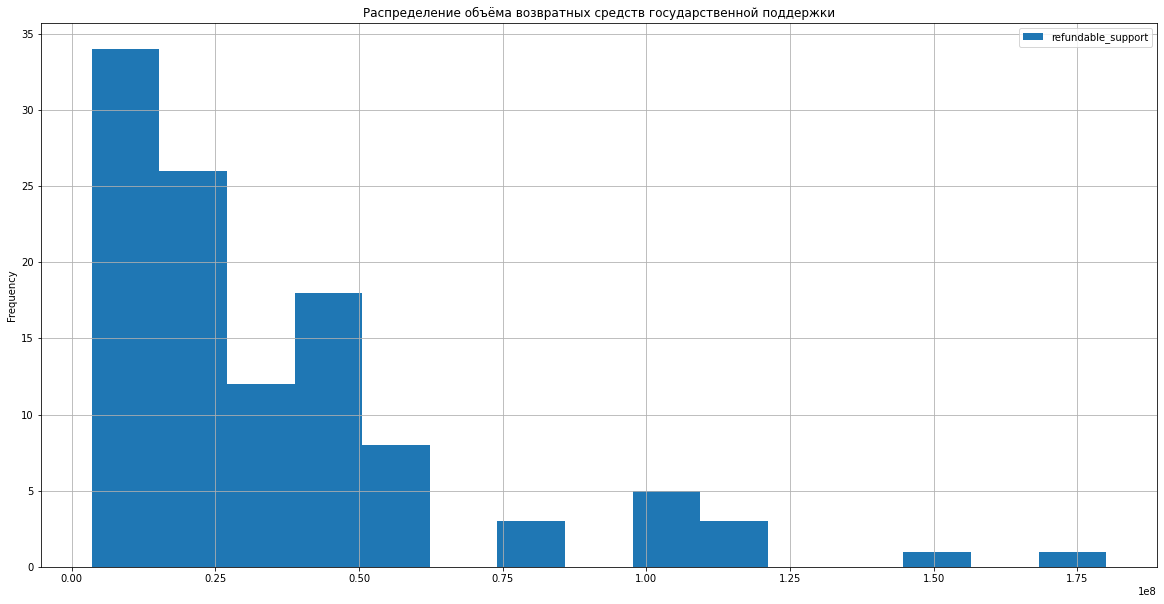

In [25]:
movies.query('refundable_support>0').plot(y = 'refundable_support', kind = 'hist', bins = 15, grid=True, figsize = (20,10));
plt.title('Распределение объёма возвратных средств государственной поддержки');

Распределение данных геометрическое, отклонения есть, но небольшие. Максимально часто встречаются объемы возвратных средств в диапазоне 0-0,25 млн.

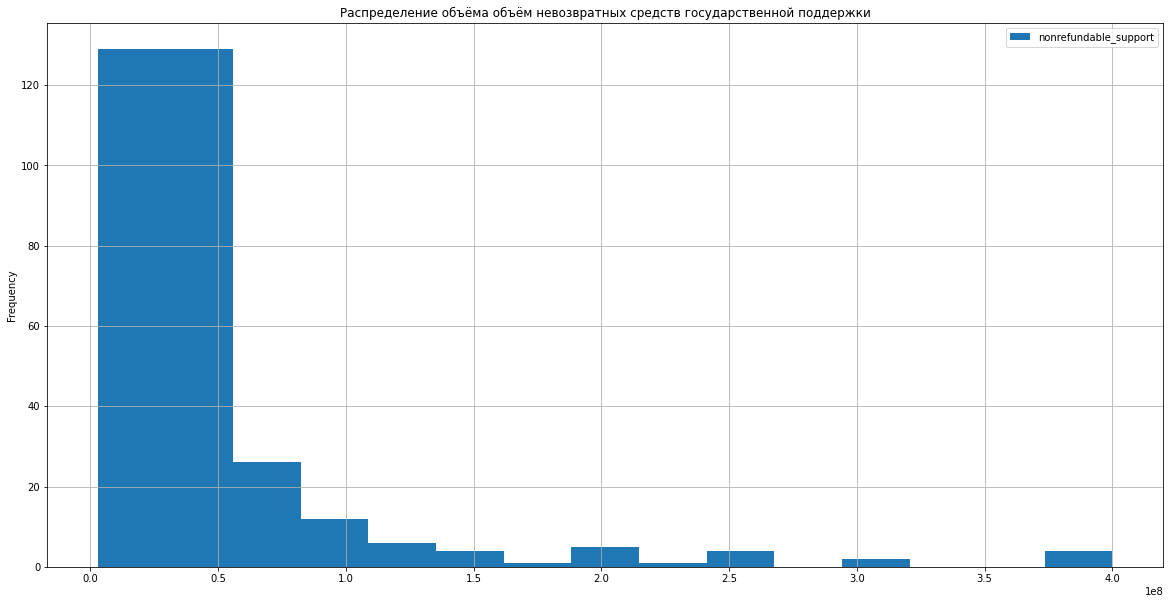

In [26]:
movies.query('nonrefundable_support>0').plot(y = 'nonrefundable_support', kind = 'hist', bins = 15, grid=True, figsize = (20,10));
plt.title('Распределение объёма объём невозвратных средств государственной поддержки');

Есть пик значений в диапазоне 0-0,6 млн. 

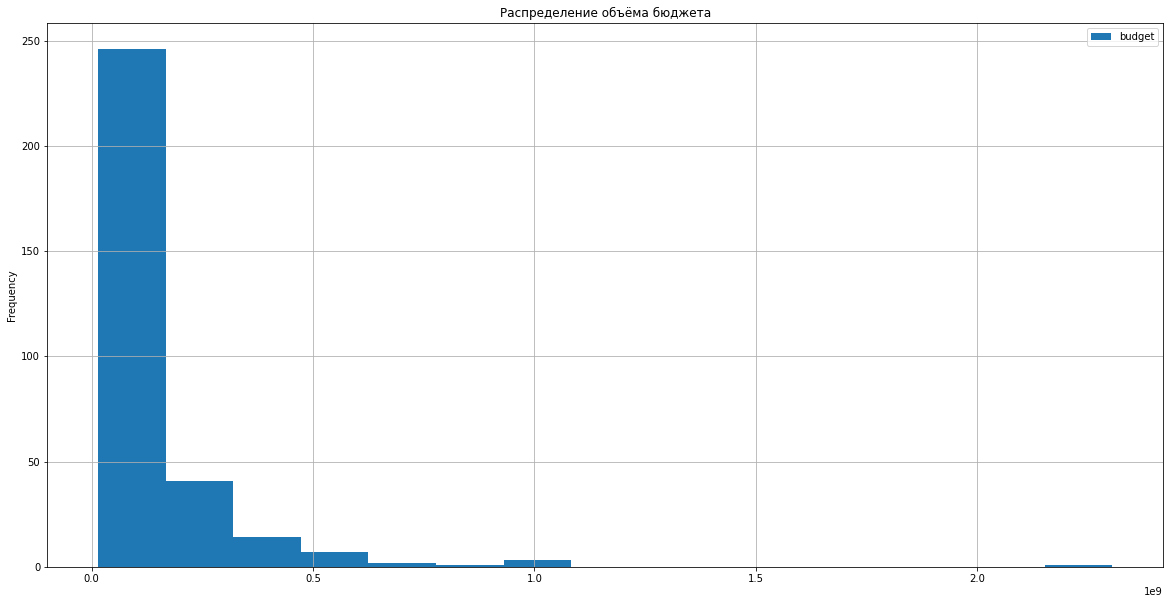

In [27]:
movies.query('budget>0').plot(y = 'budget', kind = 'hist', bins = 15, grid=True, figsize = (20,10));
plt.title('Распределение объёма бюджета');

Мы видим пик в значениях. Максимально часто встречаются объемы бюджета в диапазоне 0-0,2 млн.

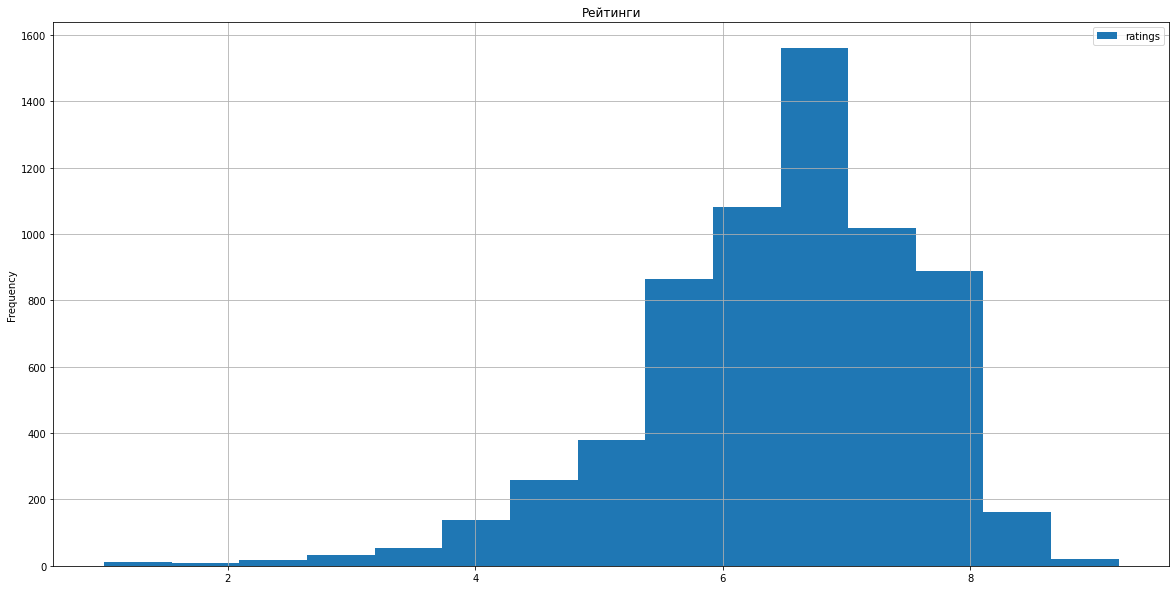

In [28]:
movies.plot(y = 'ratings', kind = 'hist', bins = 15, grid=True, figsize = (20,10));
plt.title('Рейтинги');

Мы видим нормальное распределение данных об оценках. Чаще всего оценки фильмов 5.5-8.

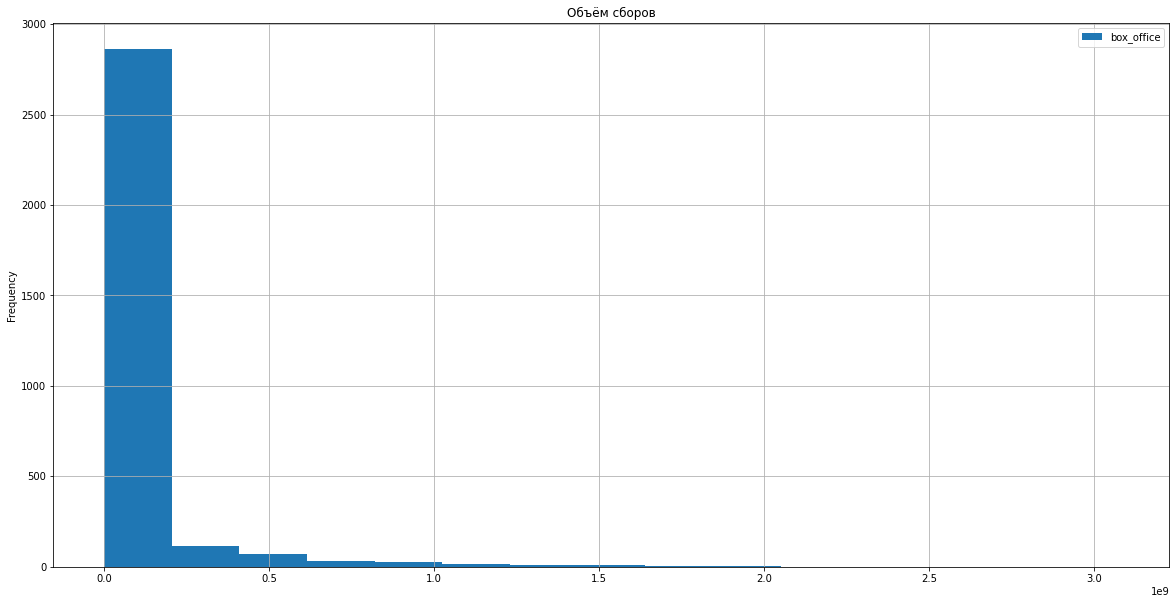

In [29]:
movies.plot(y = 'box_office', kind = 'hist', bins = 15, grid=True, figsize = (20,10));
plt.title('Объём сборов');

(0.0, 100000000.0)

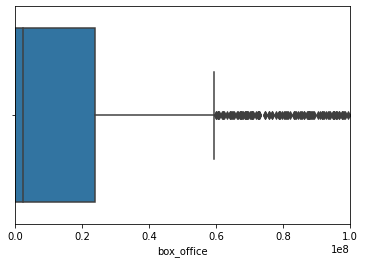

In [30]:
sb.boxplot(movies['box_office'])
plt.xlim([0,100000000]) 

Мы видим пик в значениях 0-0,2 млн. В данных присутствуют вбросы(аномальные значения) в значениях выше 0.6 млн.

In [31]:
movies['full_support'] = movies['nonrefundable_support'] + movies['refundable_support']
(movies['full_support']>=movies['budget']).sum()

17

17 раз бюджет был меньше суммы гос поддержки. Возможно денег государством было выделено больше чем потрачено. Мы видим что возвратных средств было больше всего, значи выделенные средства вернулись за ненадобностью или при  сборах за фильм.
Можно проверить все ли избытки бюджета вернулись, но поправить эти данные мы не сможем. Их можно только удалить.
Т.к. данных мало, то оставим их как есть.

In [32]:
movies['ratings'].describe()

count   6490.00
mean       6.48
std        1.10
min        1.00
25%        5.90
50%        6.60
75%        7.20
max        9.20
Name: ratings, dtype: float64

In [33]:
movies['ratings'] = round(movies['ratings'],1)
movies['ratings']

0      7.20
1      6.60
2      6.80
3      6.80
4      6.80
       ... 
7481    NaN
7482   5.40
7483    NaN
7484    NaN
7485   6.30
Name: ratings, Length: 7486, dtype: float64

Округлим значения ratings до 1 цифры послле запятой.

Создадим столбец с информацией о годе проката. 

In [34]:
movies['year'] = movies['show_start_date'].dt.year

Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

In [35]:
movies['main_director'] = movies['director'].str.partition(',')[0]
movies['main_genres'] = movies['genres'].str.partition(',')[0]

Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.

In [36]:
movies['share'] = movies['full_support'] / movies['budget']*100
movies.query('share>0')['share']

1281   33.37
1448   70.00
1498   61.27
1524   69.01
1792   62.48
        ... 
7464   51.02
7466   52.63
7474   52.97
7476   65.00
7478   66.60
Name: share, Length: 332, dtype: float64

In [37]:
movies['share'] = movies['share'].replace(float('inf'), np.nan)

<AxesSubplot:>

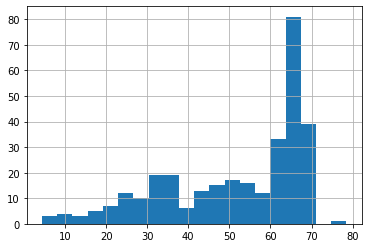

In [38]:
movies['share'].hist(bins=20)

В большинстве случаев, доля финансирования фильмов, в которых был не нулевой бюджет, составила 60-70%.

Посмотрим, сколько фильмов выходило в прокат каждый год. 

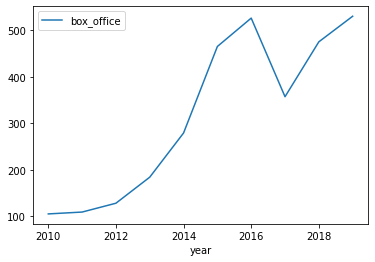

In [39]:
movies.query('box_office>=0').pivot_table(index = 'year', values = 'box_office', aggfunc = ['count']).plot(y = 'count');

Предположим, что фильмы, которые были в прокате в кинотеатре, имеют данные в столбце сборы. Тогда по графику мы видим, что количество показов фильмов в кино увеличивалось с каждым годом. В 2017 было падения количества, но далее снова пошел резкий рост.

In [40]:
movies.groupby('year')['box_office'].count()/movies.groupby('year')['puNumber'].count()

year
2010   0.11
2011   0.18
2012   0.22
2013   0.29
2014   0.35
2015   0.66
2016   0.64
2017   0.71
2018   0.53
2019   0.57
dtype: float64

<AxesSubplot:xlabel='year'>

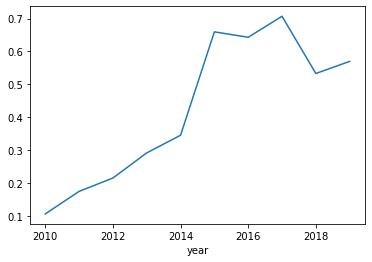

In [41]:
(movies.groupby('year')['box_office'].count()/movies.groupby('year')['puNumber'].count()).plot()

Доля фильмов, по которым есть информация о прокате в кинотеатрах выше всего в 2017 году.

Изучим, как менялась динамика проката по годам.

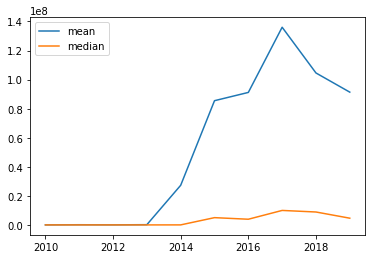

In [42]:
pivot_table_year_movies = movies.query('box_office>0').pivot_table(index = 'year', values = 'box_office', aggfunc = ['mean', 'median'])
pivot_table_year_movies.columns = ['mean', 'median']
y = pivot_table_year_movies['mean']
y1 = pivot_table_year_movies['median']
fig, ax = plt.subplots() 
ax.plot(y)
ax.plot(y1)
plt.legend(['mean','median'])
plt.show() 
#pivot_table_year_movies.plot(y = 'mean');

Посчитаем среднюю и медианную сумму сборов для каждого года.

In [43]:
pivot_table_year_movies

,mean,median
year,,
2010,24046.08,1710.00
2011,129383.17,3000.00
2012,56548.15,6220.00
2013,166478.81,3580.00
2014,27270885.93,20400.00
2015,85492132.46,5003450.15
2016,91173904.27,3915041.02
2017,136032793.33,9968340.00
2018,104565059.23,8891102.21


Медианальные значения сборов отображают более реальную картину. Т.к. были фильмы с нулевыми сборами или в некоторые года у нас очень мало данных о сборах, лучше рассматривать медианальные значения. 
Также в некоторые года предоставлено очень мало фильмов, по которым есть данные о сборах.
Параметр среднего значения очень чувствителен к вбросам в данных, а у нас есть очеь маленькие и большие значения в выборке, поэтому здесь лучше подойдет медианальное значение.

<AxesSubplot:xlabel='year'>

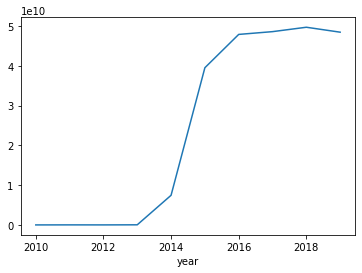

In [44]:
movies.groupby('year')['box_office'].sum().plot()

Самые низкие сборы были в 2010 году, самые высокие в 2017.
В период 2010-2014 сборы были очень низкими по сравнению с дальнейшим периодом. Это связано с тем, что данных о количестве прокатов фильмов в кино в этот период меньше всего.

Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год. Фильмы с каким возрастным ограничением собрали больше всего денег в прокате. Меняется ли картина в зависимости от года.

Text(0.5, 1.0, 'Суммарные значения сборов')

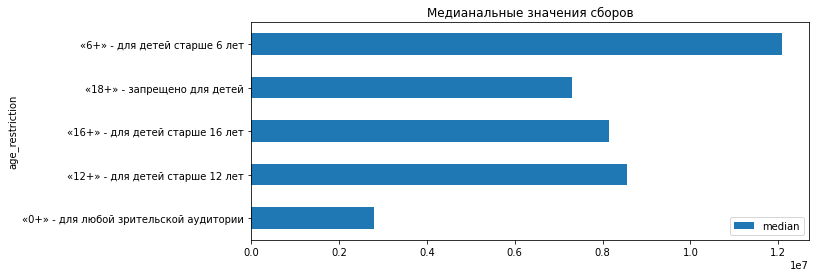

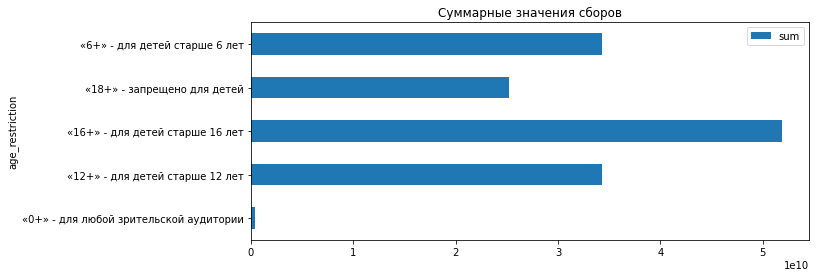

In [45]:
pivot_table_year_age = movies.query('year>2015 and year<2019').pivot_table(index = 'age_restriction', values = 'box_office', aggfunc = ['mean', 'median','sum'])
pivot_table_year_age.columns = ['mean', 'median','sum']
pivot_table_year_age.plot(y = 'median',kind='barh',figsize=(10,4));
plt.title('Медианальные значения сборов')
pivot_table_year_age.plot(y = 'sum',kind='barh',figsize=(10,4));
plt.title('Суммарные значения сборов')

Если смотреть на период 2015-2019, то больше всего было сборов в фильмах 6+.

Text(0.5, 1.0, 'Суммарные значения сборов')

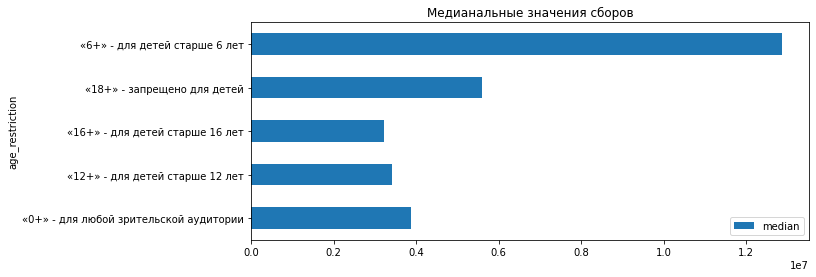

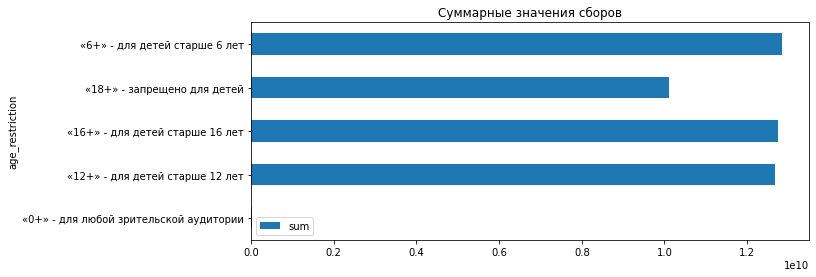

In [46]:
pivot_table_year_age = movies.query('year==2019').pivot_table(index = 'age_restriction', values = 'box_office', aggfunc = ['mean', 'median','sum'])
pivot_table_year_age.columns = ['mean', 'median','sum']
pivot_table_year_age.plot(y = 'median',kind='barh',figsize=(10,4));
plt.title('Медианальные значения сборов')
pivot_table_year_age.plot(y = 'sum',kind='barh',figsize=(10,4));
plt.title('Суммарные значения сборов')

В 2019 году больше всего сборов на фильмах 6+, аналогично периоду 2015-2019.

Text(0.5, 1.0, 'Суммарные значения сборов')

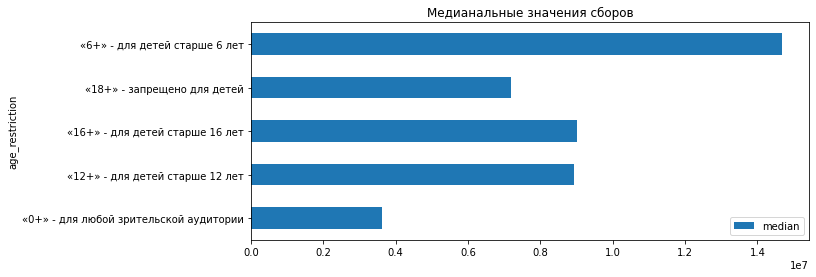

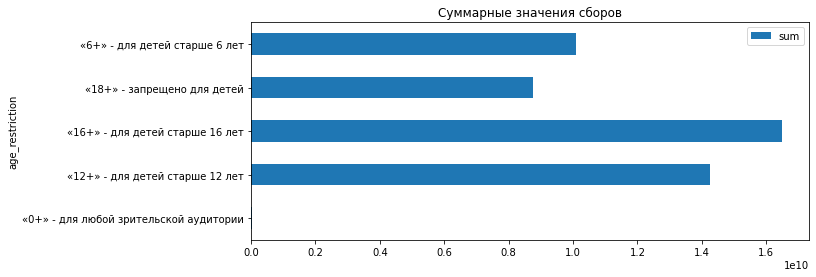

In [47]:
pivot_table_year_age = movies.query('year==2018').pivot_table(index = 'age_restriction', values = 'box_office', aggfunc = ['mean', 'median','sum'])
pivot_table_year_age.columns = ['mean', 'median','sum']
pivot_table_year_age.plot(y = 'median',kind='barh',figsize=(10,4));
plt.title('Медианальные значения сборов')
pivot_table_year_age.plot(y = 'sum',kind='barh',figsize=(10,4));
plt.title('Суммарные значения сборов')

Text(0.5, 1.0, 'Суммарные значения сборов')

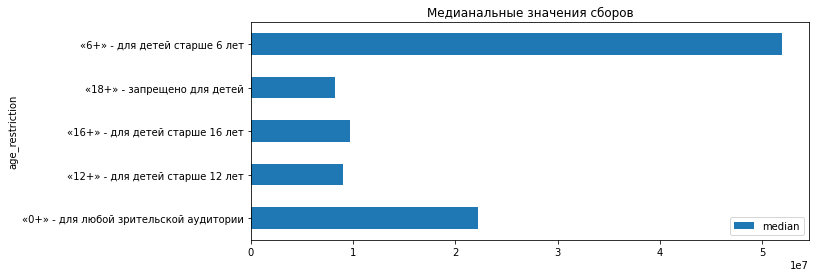

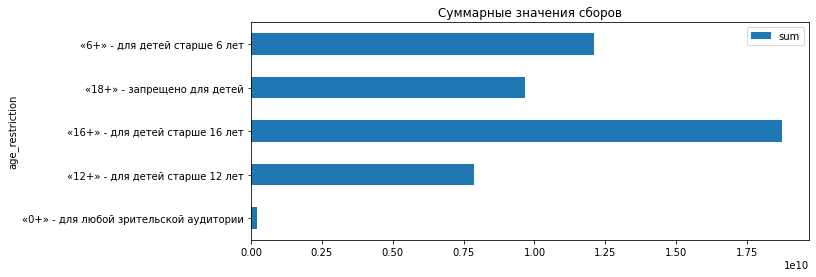

In [48]:
pivot_table_year_age = movies.query('year==2017').pivot_table(index = 'age_restriction', values = 'box_office', aggfunc = ['mean', 'median','sum'])
pivot_table_year_age.columns = ['mean', 'median','sum']
pivot_table_year_age.plot(y = 'median',kind='barh',figsize=(10,4));
plt.title('Медианальные значения сборов')
pivot_table_year_age.plot(y = 'sum',kind='barh',figsize=(10,4));
plt.title('Суммарные значения сборов')

В 2018 и 2017 годах ситуация аналогична периоду 2015-2019. Лидер по сборам фильмы с ретингом 6+.

Text(0.5, 1.0, 'Суммарные значения сборов')

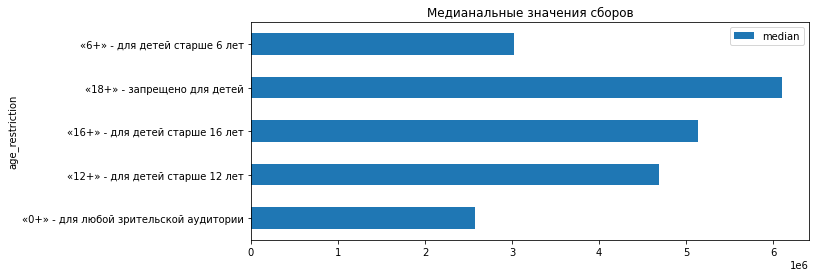

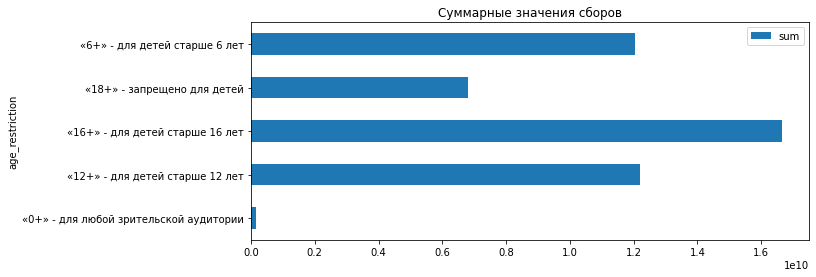

In [49]:
pivot_table_year_age = movies.query('year==2016').pivot_table(index = 'age_restriction', values = 'box_office', aggfunc = ['mean', 'median','sum'])
pivot_table_year_age.columns = ['mean', 'median','sum']
pivot_table_year_age.plot(y = 'median',kind='barh',figsize=(10,4));
plt.title('Медианальные значения сборов')
pivot_table_year_age.plot(y = 'sum',kind='barh',figsize=(10,4));
plt.title('Суммарные значения сборов')

В 2016 лидерами по сборам стали фильмы с рейтингом 18+. Возможно в этот год вышел один из самых кассовых фильмов с рейтингом 18+. 

Text(0.5, 1.0, 'Суммарные значения сборов')

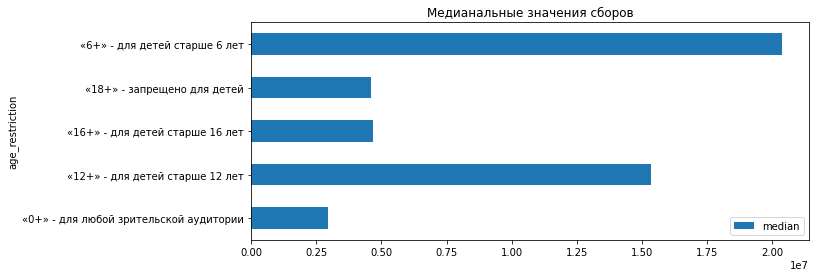

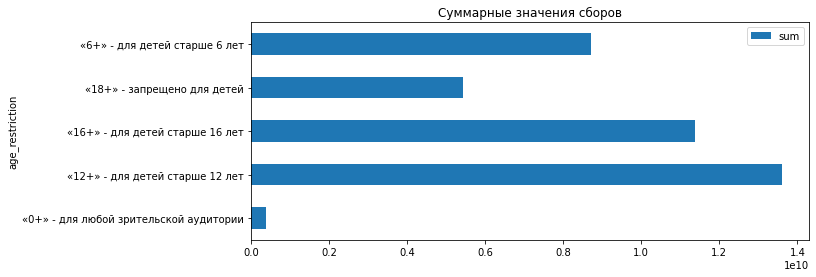

In [50]:
pivot_table_year_age = movies.query('year==2015').pivot_table(index = 'age_restriction', values = 'box_office', aggfunc = ['mean', 'median','sum'])
pivot_table_year_age.columns = ['mean', 'median','sum']
pivot_table_year_age.plot(y = 'median',kind='barh',figsize=(10,4));
plt.title('Медианальные значения сборов')
pivot_table_year_age.plot(y = 'sum',kind='barh',figsize=(10,4));
plt.title('Суммарные значения сборов')

В 2015 году лидеры  фильмы 16+.

Чем ниже рейтинг фильма, тем больше людей смогут на него пойти. Однако фильмы с рейтингом 0+ это скорее всего только мультики для совсем маленьких детей, взрослой аудитории они будут не интересны.
На мультики и фильмы рейтингом 6+ могут пойти и взрослые, и дети, и подростки. Это очень большой охват аудитории.
Фильмы с ограничением 16+ суммарно собирали больше всего денег.

### Исследуем фильмы, которые получили государственную поддержку

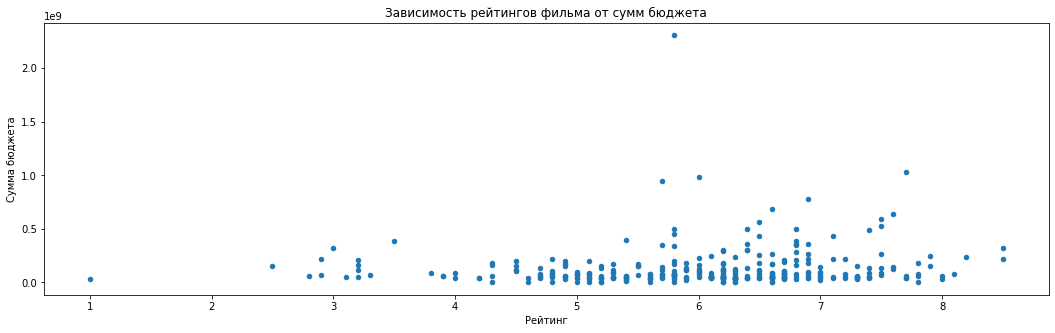

In [51]:
movies.query('full_support>0').plot(x='ratings',y='budget',kind = 'scatter',figsize=(18,5));
plt.title('Зависимость рейтингов фильма от сумм бюджета');
plt.xlabel('Рейтинг');
plt.ylabel('Сумма бюджета');

Самый высокий бюджет у фильмов с рейтингом 5.8-6. По графику видно, что чем выше рейтинг, тем чаще встречаются высокие бюджеты.

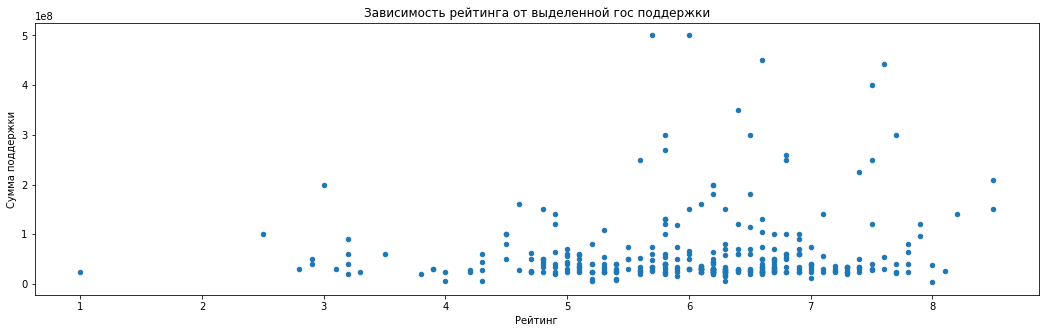

In [52]:
movies.query('full_support>0').plot(x='ratings',y='full_support',kind = 'scatter',figsize=(18,5));
plt.title('Зависимость рейтинга от выделенной гос поддержки');
plt.xlabel('Рейтинг');
plt.ylabel('Сумма поддержки');

По графику можно заметить, что высокие вклады от государства дают нам фильмы с рейтингами 5.5-8. Это неплохие результаты, поэтому спонсировать фильмы государсвоим имеет смысл.

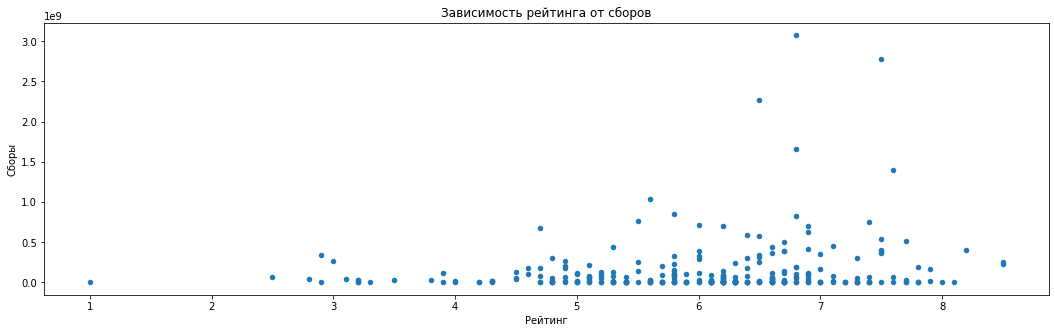

In [53]:
movies.query('full_support>0').plot(x='ratings',y='box_office',kind = 'scatter',figsize=(18,5));
plt.title('Зависимость рейтинга от сборов');
plt.xlabel('Рейтинг');
plt.ylabel('Сборы');

Самые высокие сборы у фильмов с рейтингом 6.5-7.5.
Также мы видим, что у нас мало данных о сборах фильмов с рейтингами 1-4.5. 

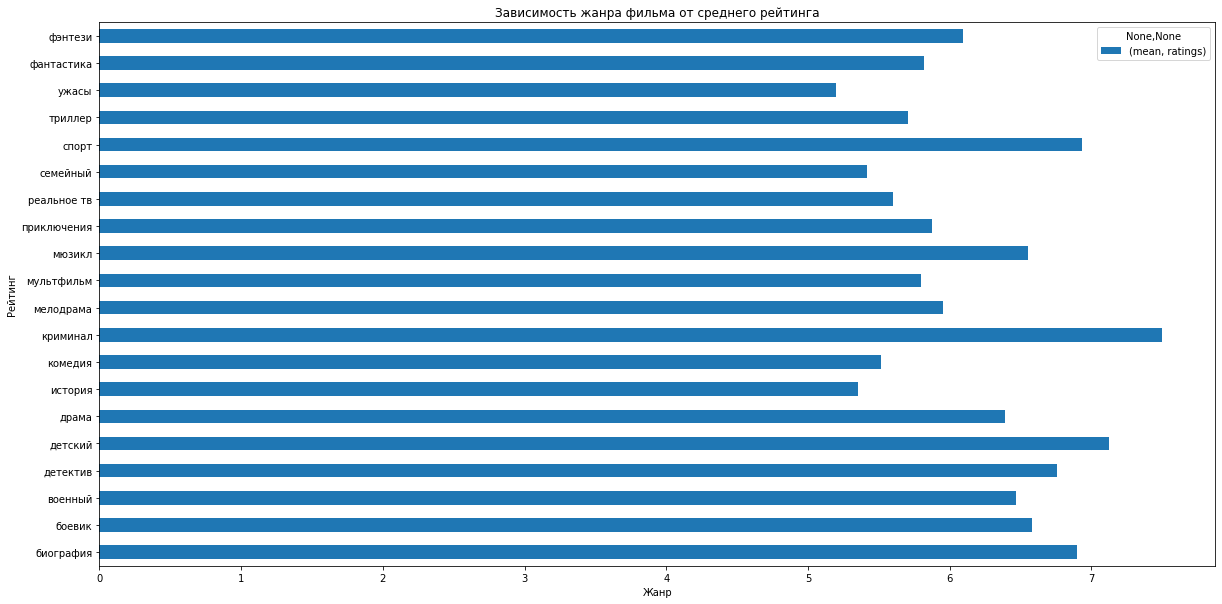

In [54]:
movies.query('full_support>0').pivot_table(index = 'main_genres', values = 'ratings', aggfunc = ['mean']).plot(kind='barh',figsize=(20,10));
plt.title('Зависимость жанра фильма от среднего рейтинга');
plt.xlabel('Жанр');
plt.ylabel('Рейтинг');

In [55]:
box_office_genres = movies.query('full_support>0').pivot_table(index = 'main_genres', values = 'ratings', aggfunc = ['mean','count'])
box_office_genres.columns = ['ratings_mean','ratings_count']
box_office_genres.sort_values(by='ratings_mean', ascending=False)

,ratings_mean,ratings_count
main_genres,,
криминал,7.50,3
детский,7.12,4
спорт,6.93,3
биография,6.90,3
детектив,6.76,5
боевик,6.58,6
мюзикл,6.55,4
военный,6.47,9
драма,6.39,92


Выше всего рейтинги у фильмов жанров детсий и криминал, но по ним очень мало данных. Лучше всего отображен рейтинг по фильмам жанра драма и он достаточно высокий.
Низкий рейтинг у большого колличества фильмов ужасов, это довольно известный факт, т.к. люди часто низко оценифают фильмы этих жанров. Фильмы их пугают или не пугают, поэтому ставятся низкие оценки.
Высокая оценка часто встречается у Аниме, документальных фильмов и драм. 

Text(0, 0.5, 'Жанр')

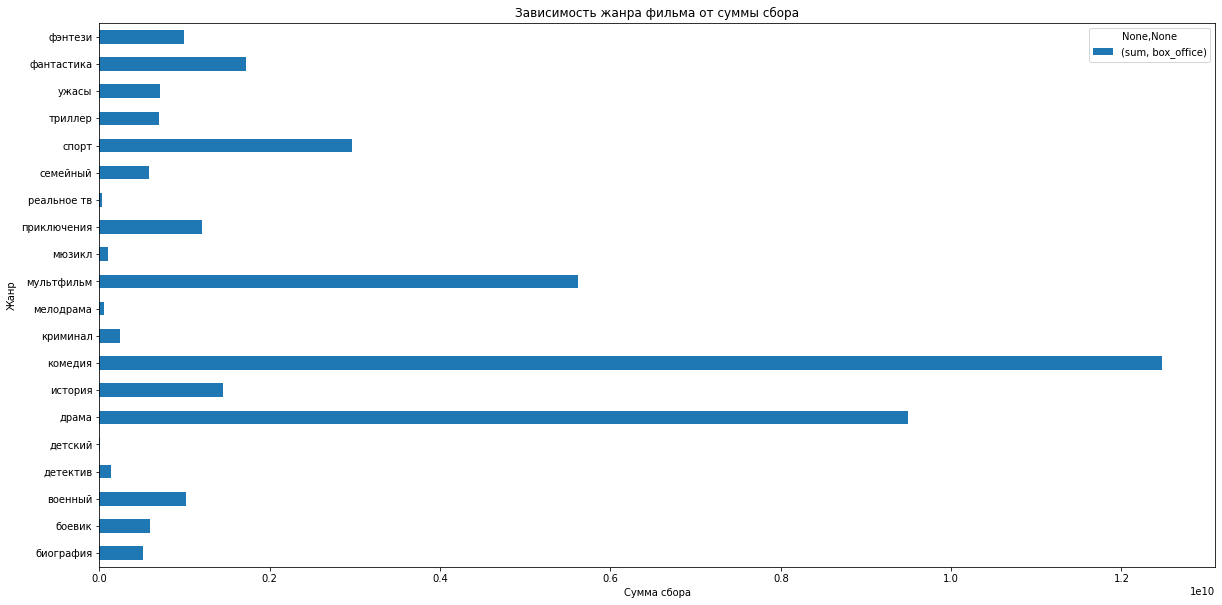

In [56]:
movies.query('full_support>0').pivot_table(index = 'main_genres', values = 'box_office', aggfunc = ['sum']).plot(kind='barh',figsize=(20,10));
plt.title('Зависимость жанра фильма от суммы сбора')
plt.xlabel('Сумма сбора')
plt.ylabel('Жанр')

In [57]:
money_genres = movies.query('full_support>0').pivot_table(index = 'main_genres', values = 'box_office', aggfunc = ['sum','count','median'])
money_genres.columns = ['box_office_sum','count','median']
money_genres.sort_values(by='median', ascending=False)

,box_office_sum,count,median
main_genres,,,
история,1455468234.57,4,364283970.76
спорт,2967768387.44,3,168688859.10
приключения,1205596976.62,6,115738715.07
биография,516883037.64,3,114090162.74
мультфильм,5622014134.66,30,94940314.84
семейный,584424749.65,6,76276620.08
фантастика,1718204279.39,10,55019784.36
боевик,595928934.50,6,44681753.93
реальное тв,32721103.43,1,32721103.43


В зависимости жанра от медианальных сумм сборов, мы видим, что самыми прибыльными оказались фильмы в жанре комедия, драма и мультфильм.

### Общий вывод

1. При обработке полученных датесетов было выявлено:
    - Недостает большого колличества данных о сборах, бюджете и сумм поддержки государством
    - Категориальная информация, например имена продюсеров и режиссеров, названия фильмов и студий, жанры были записаны транслитом, что повлекло за собой много неявных дублей и сложно читаемые данные. 
Всю эту информацию можно передать заказчику, чтобы в дальнейшем работу было вести проще.

2. В количественных значениях было обнаружено, что бюджет в некоторых случаях был ниже, чем гос поддержка фильма, природа этого точно не ясна. Можно предположить, что все излишки возвращались в фонд или что были дополнительные расходы. Также возможно был какой-то нелегальный оборот бюджетных денег. Это можно уточнить у заказчика.

3. Проанализировав данные по прокатам в кинотеатрах, которые у нас есть, мы выявили:
    - Количество показов фильмов в кино увеличивалось с каждым годом. 
    - В 2017 было падение количества, но далее снова пошел резкий рост. 
    - Полнее всего был представлен период 2016-2017 года.
    - Динамика проката была положительной. 
    - Самые низкие сборы были в 2010 году, самые высокие в 2017. 
    - В период 2010-2014 сборы были очень низкими по сравнению с дальнейшим периодом. Это связано с тем, что данных о количестве прокатов фильмов в кино в этот период меньше всего.
    - Возрастное ограничение влияет на сборы фильмов в кинотеатрах. Более доступные широкому кругу людей фильмы с рейтингом 16+ приносят больше всего дохода.
    
4. Также была выявлена зависимость бюджета и гос поддержки от рейтинга фильма. Большие бюджеты и поддержка давали в результате фильмы с хорошим рейтингом 5-8. 
От рейтингда зависили сборы, в сумме фильмы с рейтингами 5-8 давали наибольшие сборы.
Если наблюдать зависимость главного жанра фильма от рейтинга, то видно что фильмы ужасов нравятся людям меньше всего. Фильмы в жанрах комедия, драма и мультфильм приносят больше всего сборов.